In [2]:
! pip install plotly
! pip install folium
! pip install fuzzywuzzy
! pip install python-Levenshtein

In [3]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [4]:
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import folium

# for diagramming 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns


# For serialization and deserialization of data from/to file
import pickle

In [5]:
# read the json file from your data folder into a data frame
#df = pd.read_csv(r'C:\Users\chz\Documents\BI Exercise\\BI Exam\global air pollution dataset.csv')
df = pd.read_csv(r'DataSæt\global air pollution dataset.csv')
df2 = pd.read_csv(r"Datasæt\2017_-_Cities_Community_Wide_Emissions.csv")

In [6]:
# Standardizing the 'Country' column in both DataFrames
df['Country'] = df['Country'].str.title().str.strip()
df2['Country'] = df2['Country'].str.title().str.strip()

# Merging df and df2 based on 'Country' after standardization
df_merged = pd.merge(df, df2, on='Country', how='outer')

# Sampling 50 rows from the merged DataFrame to verify the operation
# Note: Since the actual DataFrames are empty in this simulation, this step is for demonstration purposes.
sampled_df_merged = df_merged.sample(50)

In [7]:
df_merged.count()

Country                                         65872
City_x                                          66200
AQI Value                                       66201
AQI Category                                    66201
CO AQI Value                                    66201
CO AQI Category                                 66201
Ozone AQI Value                                 66201
Ozone AQI Category                              66201
NO2 AQI Value                                   66201
NO2 AQI Category                                66201
PM2.5 AQI Value                                 66201
PM2.5 AQI Category                              66201
Account number                                  53096
Organization                                    53096
City_y                                          53096
Region                                          53096
C40                                             14673
Access                                          53096
Reporting year              

In [8]:
df_merged.isnull().sum()

Country                                           427
City_x                                             99
AQI Value                                          98
AQI Category                                       98
CO AQI Value                                       98
CO AQI Category                                    98
Ozone AQI Value                                    98
Ozone AQI Category                                 98
NO2 AQI Value                                      98
NO2 AQI Category                                   98
PM2.5 AQI Value                                    98
PM2.5 AQI Category                                 98
Account number                                  13203
Organization                                    13203
City_y                                          13203
Region                                          13203
C40                                             51626
Access                                          13203
Reporting year              

In [9]:
df_merged.drop(columns=['Gases included'], inplace=True)
df_merged.drop(columns=['Comment'], inplace=True)
df_merged.drop(columns=['Total Scope 1 Emissions (metric tonnes CO2e)'], inplace=True)
df_merged.drop(columns=['Total Scope 2 Emissions (metric tonnes CO2e)'], inplace=True)




In [10]:
df_merged['C40'] = df_merged['C40'].fillna(False)


In [11]:
# Delete the null values from the data frame
df_merged = df_merged.dropna()

In [12]:
# Check the data frame for null values
df_merged.isnull().sum()

Country                                      0
City_x                                       0
AQI Value                                    0
AQI Category                                 0
CO AQI Value                                 0
CO AQI Category                              0
Ozone AQI Value                              0
Ozone AQI Category                           0
NO2 AQI Value                                0
NO2 AQI Category                             0
PM2.5 AQI Value                              0
PM2.5 AQI Category                           0
Account number                               0
Organization                                 0
City_y                                       0
Region                                       0
C40                                          0
Access                                       0
Reporting year                               0
Accounting year                              0
Boundary                                     0
Protocol     

In [13]:
df_merged.count()

Country                                      28833
City_x                                       28833
AQI Value                                    28833
AQI Category                                 28833
CO AQI Value                                 28833
CO AQI Category                              28833
Ozone AQI Value                              28833
Ozone AQI Category                           28833
NO2 AQI Value                                28833
NO2 AQI Category                             28833
PM2.5 AQI Value                              28833
PM2.5 AQI Category                           28833
Account number                               28833
Organization                                 28833
City_y                                       28833
Region                                       28833
C40                                          28833
Access                                       28833
Reporting year                               28833
Accounting year                

In [14]:
df = df_merged

<Figure size 1000x600 with 0 Axes>

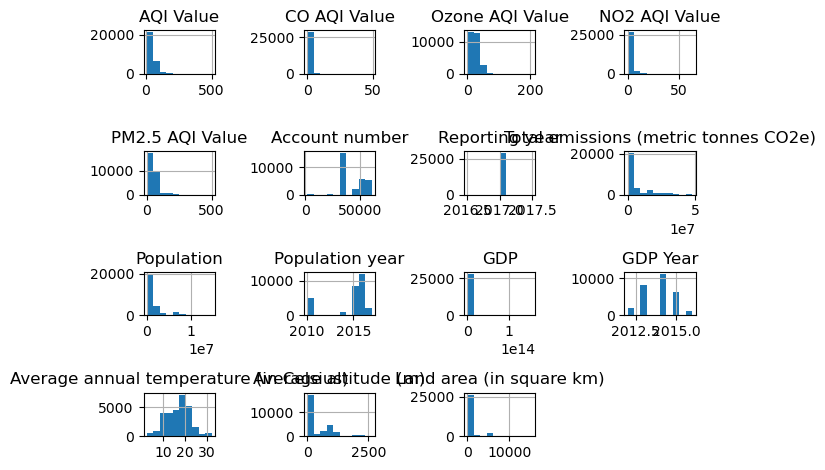

In [15]:
plt.figure(figsize= (10, 6))

# Plot histograms for all columns in the DataFrame
df.hist()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

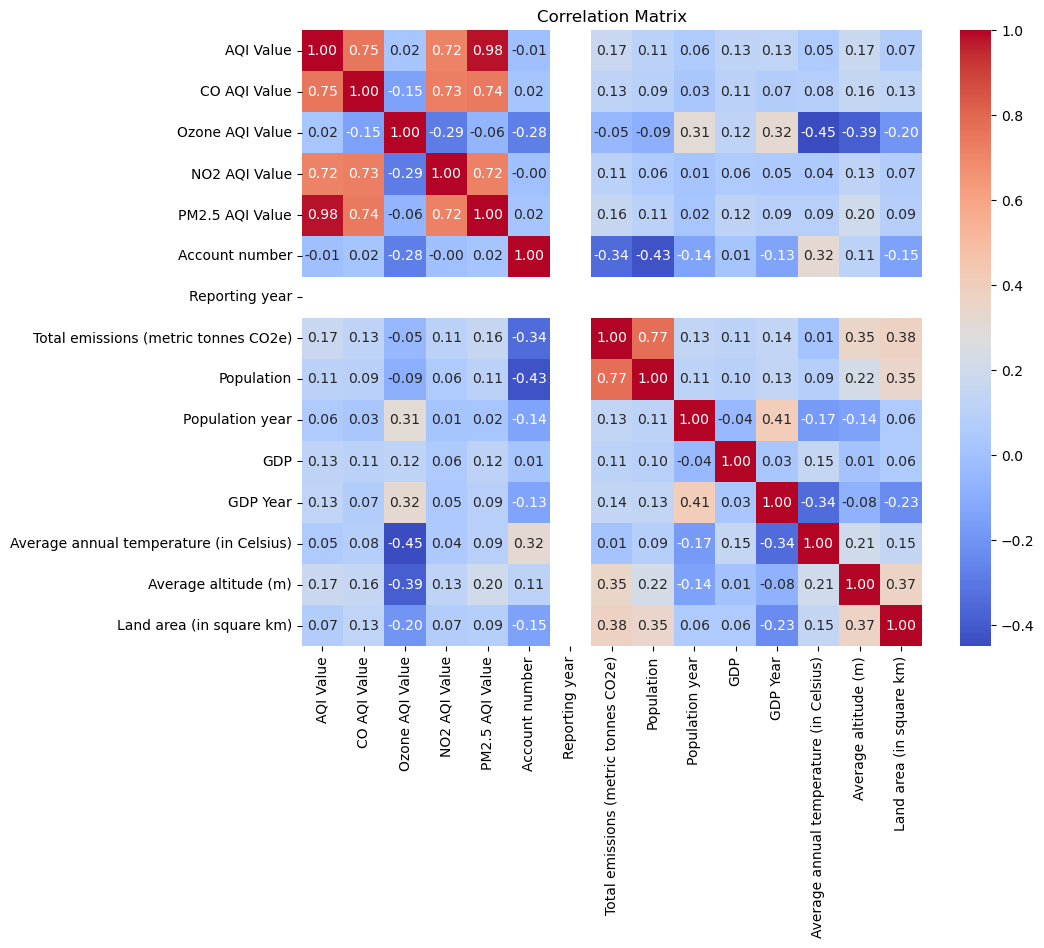

In [16]:
# We have to convert the data from float to int in order to use pandas to calculate the correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])


df_cleaned = numeric_df.dropna()
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Axes: >

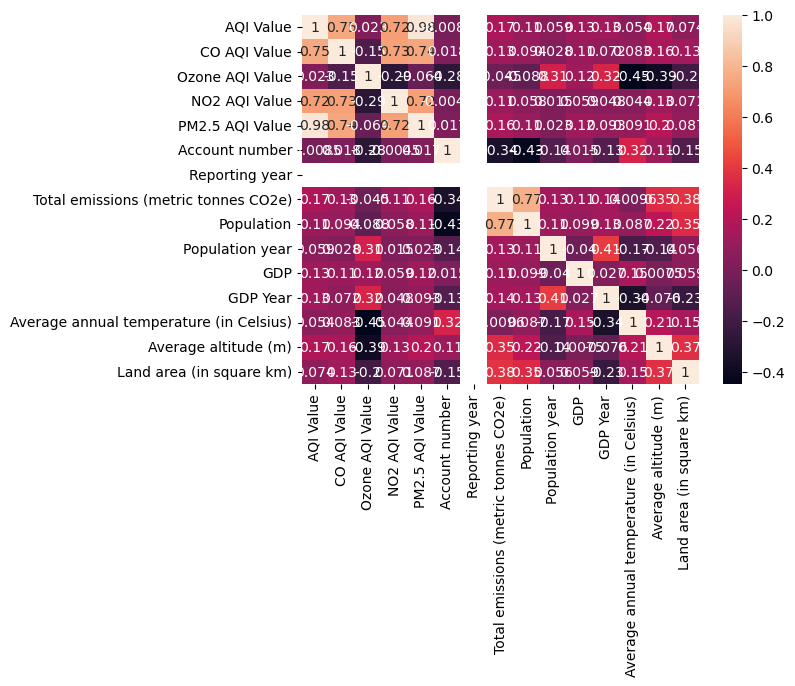

In [17]:
sns.heatmap(corr_matrix, annot=True)

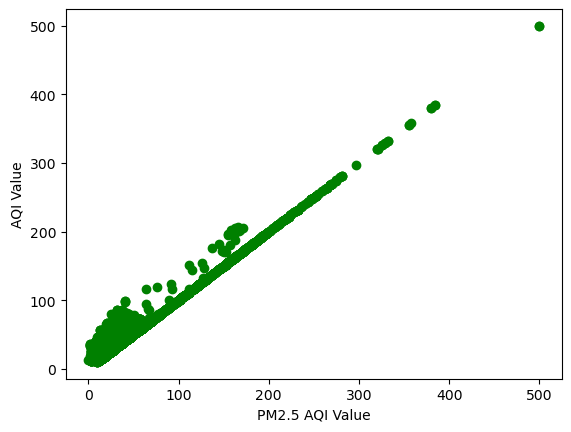

In [18]:

plt.xlabel('PM2.5 AQI Value')
plt.ylabel('AQI Value')
plt.scatter(df['PM2.5 AQI Value'], df['AQI Value'], color='green')
plt.show()


C:\Users\bruger\AppData\Local\Temp\ipykernel_15048\3510188199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PM2.5 AQI Value'],  label='PM2.5 AQI Value', norm_hist=True)


<Axes: xlabel='PM2.5 AQI Value', ylabel='Density'>

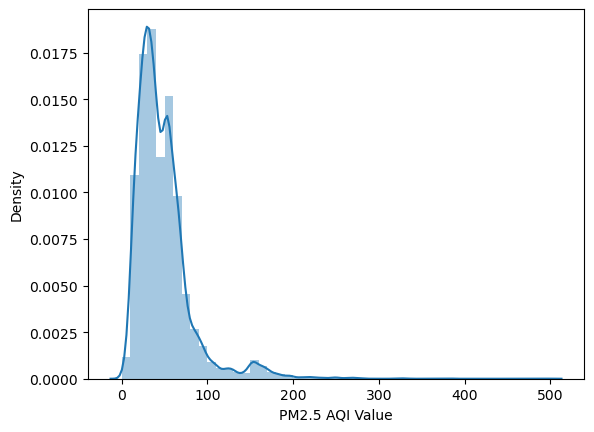

In [19]:
sns.distplot(df['PM2.5 AQI Value'],  label='PM2.5 AQI Value', norm_hist=True)

C:\Users\bruger\AppData\Local\Temp\ipykernel_15048\809496334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AQI Value'],  label='AQI Value', norm_hist=True)


<Axes: xlabel='AQI Value', ylabel='Density'>

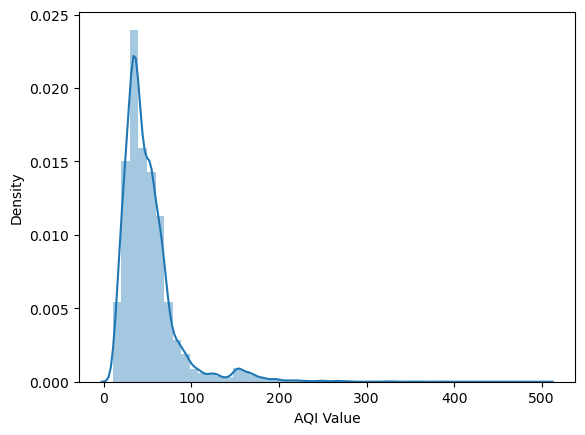

In [20]:
sns.distplot(df['AQI Value'],  label='AQI Value', norm_hist=True)

In [21]:
X = df['AQI Value'].values.reshape(-1, 1)
y = df['PM2.5 AQI Value'].values.reshape(-1, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24508, 1)
(24508, 1)
(4325, 1)
(4325, 1)


In [24]:
y_test

array([[66.],
       [27.],
       [67.],
       ...,
       [59.],
       [40.],
       [30.]])

In [25]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [26]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [27]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [28]:
a

array([[1.02174063]])

In [29]:
b

array([-3.65070404])

In [30]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[63.78417784],
       [23.93629309],
       [64.80591848],
       ...,
       [56.6319934 ],
       [37.21892134],
       [27.001515  ]])

In [31]:
y_test

array([[66.],
       [27.],
       [67.],
       ...,
       [59.],
       [40.],
       [30.]])

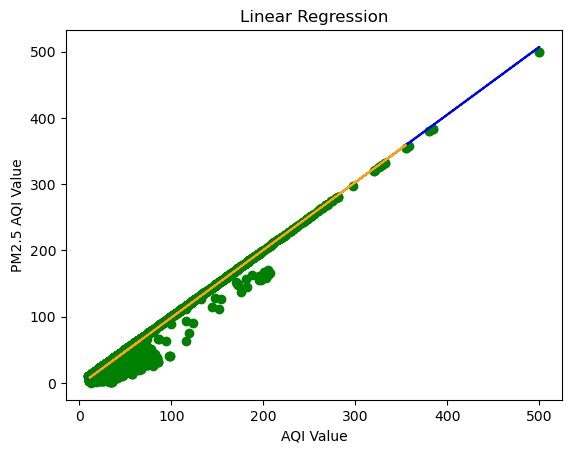

In [32]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

In [33]:
R2 = myreg.score(X, y)
R2

0.9638532393439958

In [34]:
X, y = df['PM2.5 AQI Value'], df['AQI Value']

In [35]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [36]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24508,)
(24508,)
(4325,)
(4325,)


In [37]:
# randomly selected
y_train

24252    74.0
22929    40.0
7745     35.0
46102    37.0
15051    66.0
         ... 
20414    17.0
34605    28.0
10328    51.0
22543    17.0
1654     61.0
Name: AQI Value, Length: 24508, dtype: float64

In [38]:
# build a model from the train data with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [39]:
model

array([0.94337442, 5.25121058])

In [40]:
a, b = model[0], model[1]

In [41]:
# build the model from the test data
test = np.polyfit(X_test, y_test, 1)
test

array([0.94529   , 5.24735249])

In [42]:
a1, b1 = test[0], test[1]

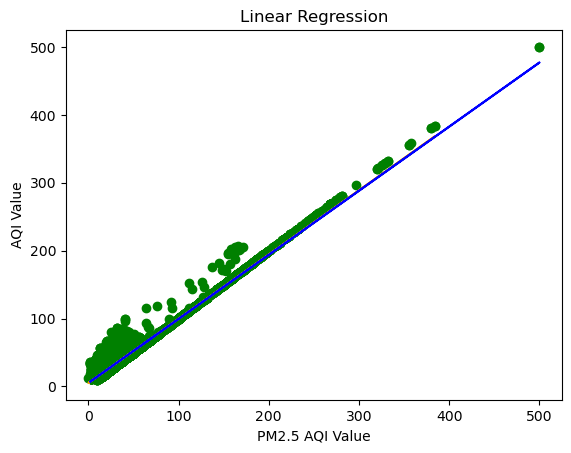

In [43]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.plot(X_train, a*X_train + b, color='blue')

plt.xlabel('PM2.5 AQI Value')
plt.ylabel('AQI Value')
plt.show()

In [44]:
price_predicted = myreg.predict([[160]])
price_predicted

array([[159.8277975]])

In [45]:
price_predict = a*160 + b
price_predict

156.1911184184636

In [46]:
# assume a new price 
length = 91
price_predicted = myreg.predict([[length]])
price_predicted

array([[89.32769371]])

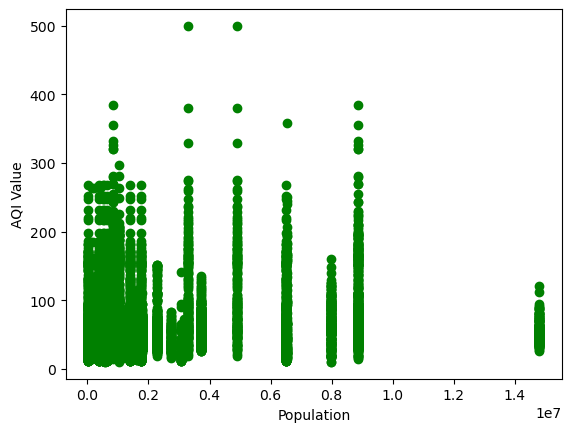

In [51]:
#lets try with something thats not linær obvious
plt.xlabel('Population')
plt.ylabel('AQI Value')
plt.scatter(df['Population'], df['AQI Value'], color='green')
plt.show()

C:\Users\bruger\AppData\Local\Temp\ipykernel_15048\3586239839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Population'],  label='Population', norm_hist=True)


<Axes: xlabel='Population', ylabel='Density'>

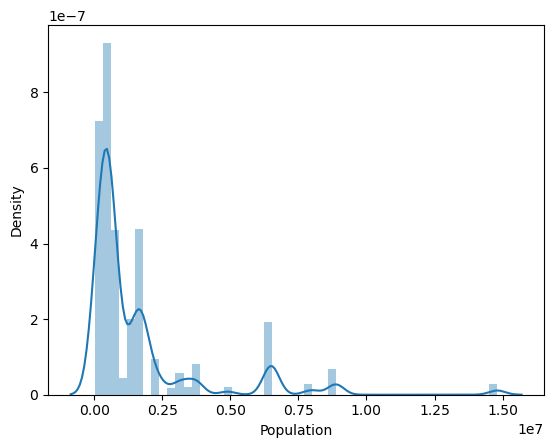

In [52]:
sns.distplot(df['Population'],  label='Population', norm_hist=True)

In [53]:
X = df['AQI Value'].values.reshape(-1, 1)
y = df['Population'].values.reshape(-1, 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24508, 1)
(24508, 1)
(4325, 1)
(4325, 1)


In [56]:
y_test

array([[6527903.],
       [ 210931.],
       [1409671.],
       ...,
       [2265886.],
       [1409671.],
       [6498837.]])

In [57]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [58]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [59]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [60]:
a

array([[8156.92035605]])

In [61]:
b

array([1185927.14756944])

In [62]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[1724283.8910685 ],
       [1406163.99718269],
       [1732440.81142454],
       ...,
       [1667185.44857617],
       [1512203.9618113 ],
       [1430634.75825083]])

In [63]:
y_test

array([[6527903.],
       [ 210931.],
       [1409671.],
       ...,
       [2265886.],
       [1409671.],
       [6498837.]])

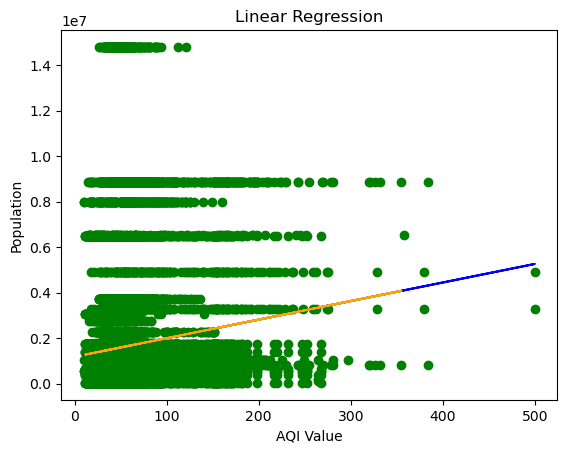

In [64]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('AQI Value')
plt.ylabel('Population')
plt.show()

In [65]:
R2 = myreg.score(X, y)
R2

0.011865717973585266

In [66]:
X, y = df['PM2.5 AQI Value'], df['AQI Value']

In [67]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [68]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24508,)
(24508,)
(4325,)
(4325,)


In [69]:
# randomly selected
y_train

24252    74.0
22929    40.0
7745     35.0
46102    37.0
15051    66.0
         ... 
20414    17.0
34605    28.0
10328    51.0
22543    17.0
1654     61.0
Name: AQI Value, Length: 24508, dtype: float64

In [70]:
# build a model from the train data with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [71]:
model

array([0.94337442, 5.25121058])

In [72]:
a, b = model[0], model[1]

In [73]:
# build the model from the test data
test = np.polyfit(X_test, y_test, 1)
test

array([0.94529   , 5.24735249])

In [74]:
a1, b1 = test[0], test[1]

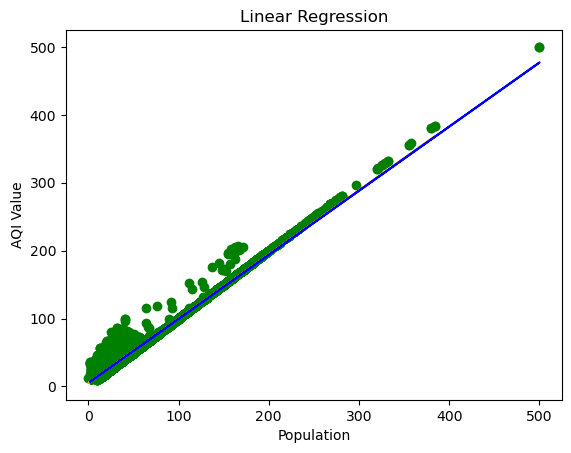

In [75]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.plot(X_train, a*X_train + b, color='blue')

plt.xlabel('Population')
plt.ylabel('AQI Value')
plt.show()

In [76]:
price_predicted = myreg.predict([[160]])
price_predicted

array([[2491034.40453685]])

In [77]:
price_predict = a*160 + b
price_predict

156.1911184184636

In [78]:
# assume a new price 
length = 91
price_predicted = myreg.predict([[length]])
price_predicted

array([[1928206.89996966]])